<a href="https://colab.research.google.com/github/koushik-mahato/College-Project/blob/Heart-Disease-Prediction-Using-Deep-Learning/Before_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
LABELS = ["Don't Have Heart Disease", "Have Heart Disease"]

In [ ]:
# Load dataset
data = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
cardio = data

In [ ]:
cardio.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
cardio.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


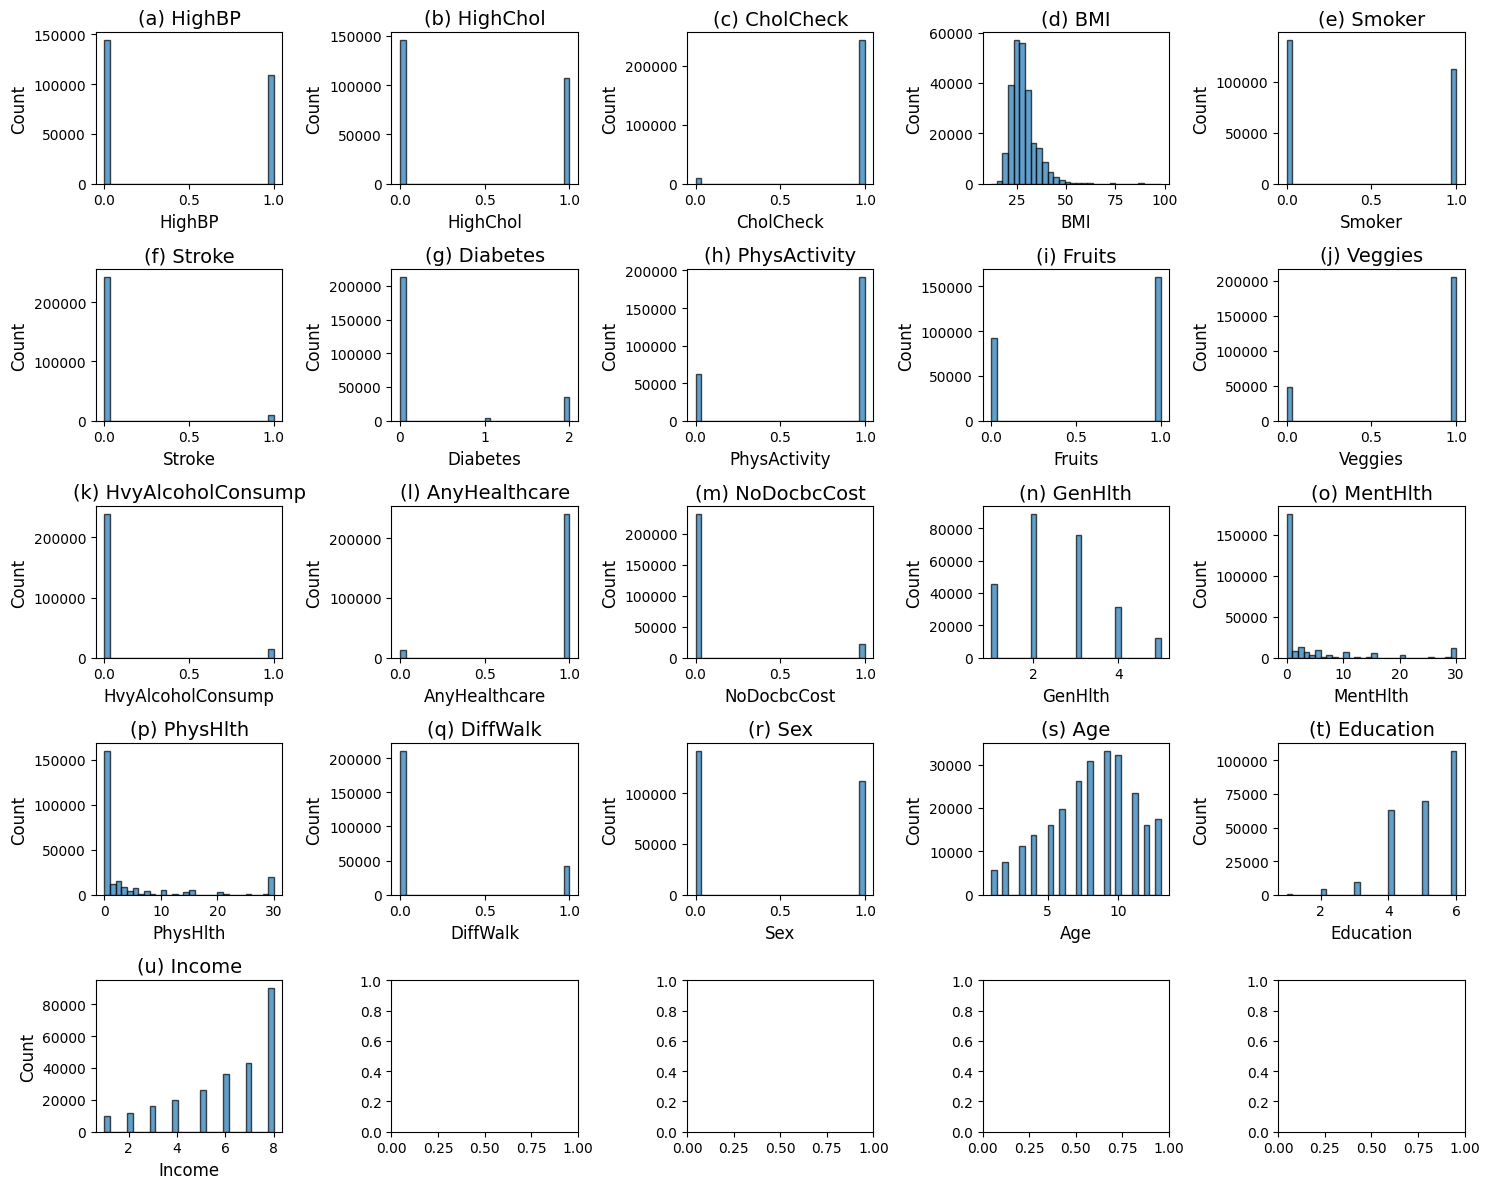

In [ ]:
# Set up the plot
fig, axes = plt.subplots(5, 5, figsize=(15, 12))  # Adjust the grid size to 4x5
axes = axes.flatten()

# Define the feature names
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker','Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Plot histograms for each feature
for i, feature in enumerate(feature_names):
    # Use cardio DataFrame instead of data dictionary
    axes[i].hist(cardio[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'({chr(97 + i)}) {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["HeartDiseaseorAttack"]]
# Store the variable we are predicting
target = "HeartDiseaseorAttack"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(253680, 21)
(253680,)


In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Count')

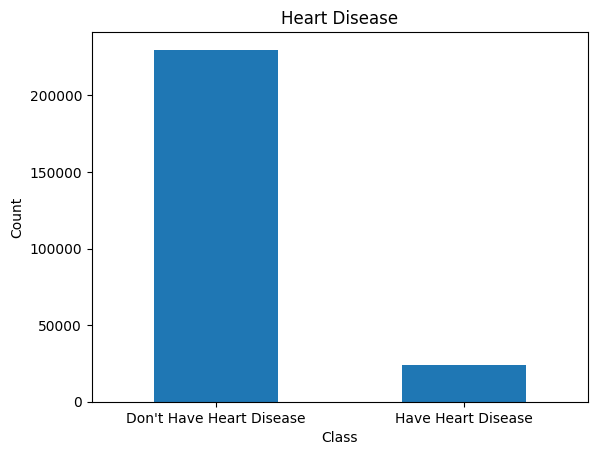

In [ ]:
count_classes = pd.value_counts(data['HeartDiseaseorAttack'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Heart Disease")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Count")

In [ ]:
have_had_heart_disease = data[data['HeartDiseaseorAttack']==1]

have_not_had_heart_disease = data[data['HeartDiseaseorAttack']==0]

In [ ]:
print(have_had_heart_disease.shape,have_not_had_heart_disease.shape)

(23893, 22) (229787, 22)


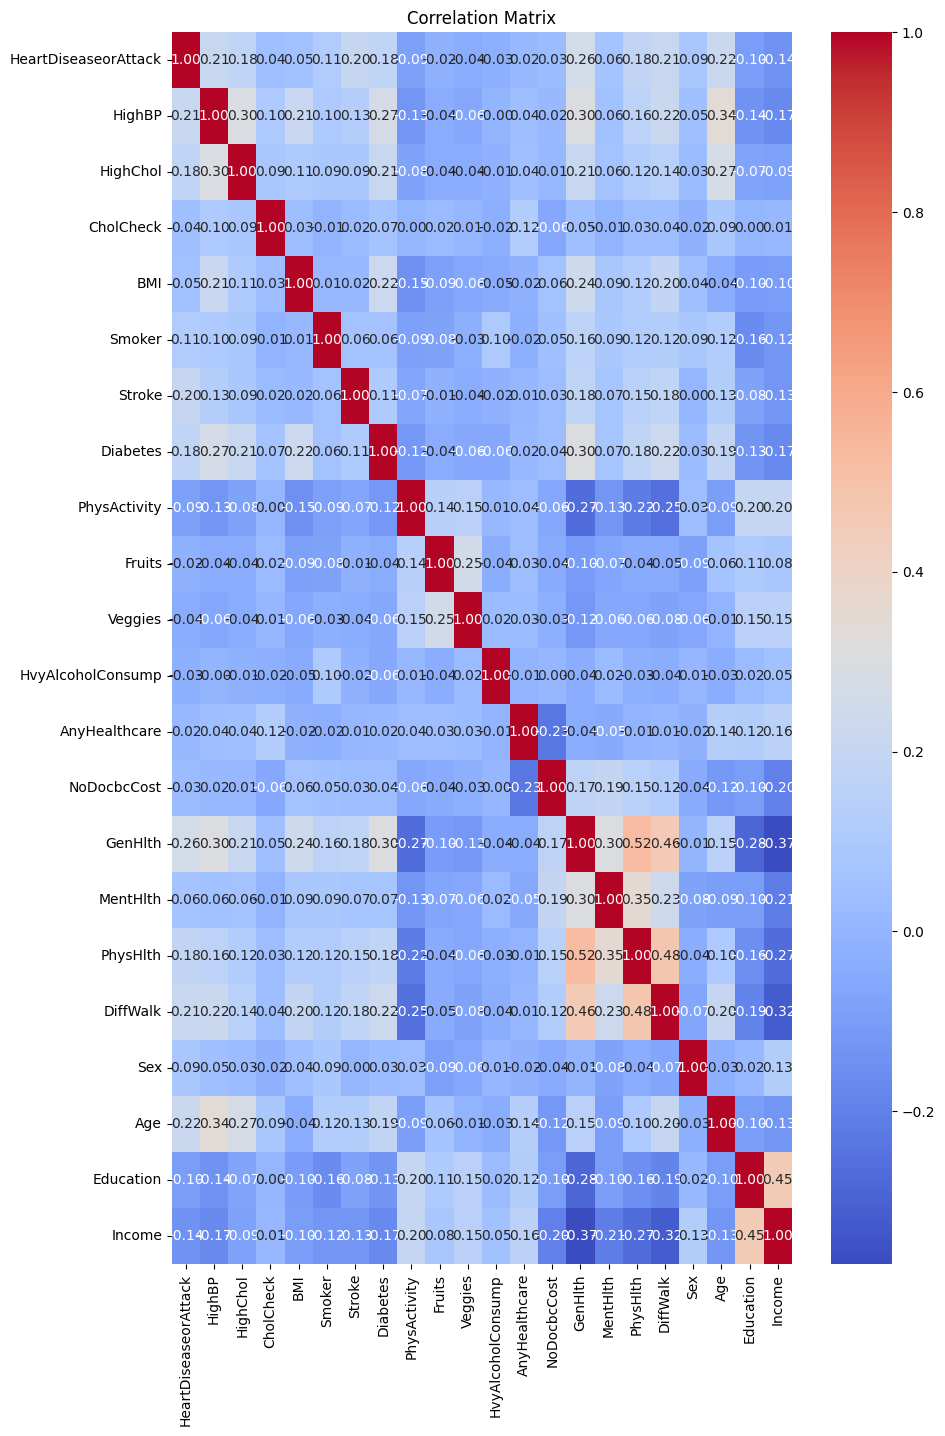

In [ ]:
plt.figure(figsize=(10, 16))
sns.heatmap(cardio.corr(), annot=True, cmap='coolwarm', fmt=".2f",)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = cardio.iloc[:, 1:].values # get all record, for each record get all column exclude the first (label) column => independent variable
y = cardio.iloc[:, 0].values # get all record, for each record only get the first column => dependent variable or the label need predict

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


In [ ]:
results = {}

In [ ]:
# Model training
mlp = MLPClassifier(max_iter=300, random_state=110)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=110)

In [ ]:
# Model predictions
y_pred = mlp.predict(X_test)

In [ ]:
results['MLP'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
]

In [ ]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)

accuracy:  <function accuracy_score at 0x79e94606a3b0>
accuracy:  90.82781456953643
precision:  87.91860313441236
recall:  90.82781456953643
f1_score:  87.69026630492819


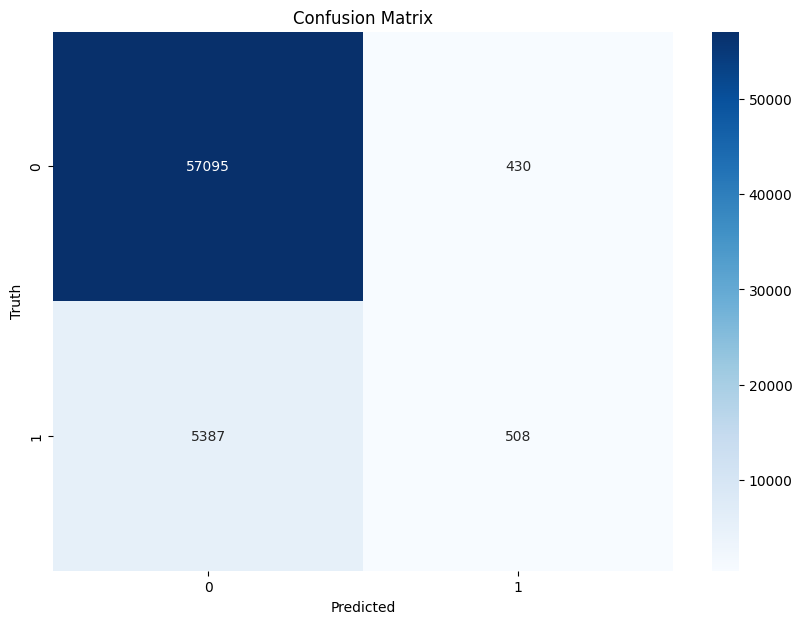

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

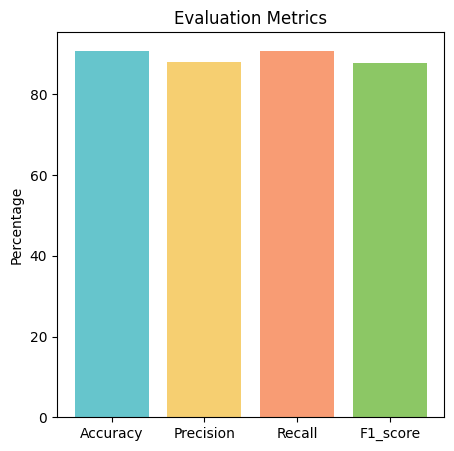

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(5, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X)

In [ ]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
X_train_cnn = X_train_std.reshape(X_train_std.shape[0], X_train_std.shape[1], 1)
X_test_cnn = X_test_std.reshape(X_test_std.shape[0], X_test_std.shape[1], 1)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import seaborn as sns
from tensorflow.python.keras import layers, models
from tensorflow.python.keras.engine import data_adapter
def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [ ]:
cnn = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 19, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12352     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/10
5946/5946 [==============================] - 36s 6ms/step - loss: 0.2560 - accuracy: 0.9068 - val_loss: 0.2512 - val_accuracy: 0.9090
Epoch 2/10
5946/5946 [==============================] - 32s 5ms/step - loss: 0.2514 - accuracy: 0.9071 - val_loss: 0.2501 - val_accuracy: 0.9091
Epoch 3/10
5946/5946 [==============================] - 34s 6ms/step - loss: 0.2504 - accuracy: 0.9071 - val_loss: 0.2521 - val_accuracy: 0.9085
Epoch 4/10
5946/5946 [==============================] - 34s 6ms/step - loss: 0.2500 - accuracy: 0.9074 - val_loss: 0.2501 - val_accuracy: 0.9083
Epoch 5/10
5946/5946 [==============================] - 33s 6ms/step - loss: 0.2496 - accuracy: 0.9075 - val_loss: 0.2502 - val_accuracy: 0.9081
Epoch 6/10
5946/5946 [==============================] - 33s 6ms/step - loss: 0.2492 - accuracy: 0.9075 - val_loss: 0.2486 - val_accuracy: 0.9080
Epoch 7/10
5946/5946 [==============================] - 34s 6ms/step - loss: 0.2487 - accuracy: 0.9076 - val_loss: 0.2489 - val_ac

In [ ]:
# Predict probabilities for test data
y_pred_prob = cnn.predict(X_test_cnn)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype("int32")
# Calculate accuracy_precision, recall, F1 score, and confusion matrix
accuracy_percentage = accuracy_score(y_test, y_pred_binary) * 100
precision_percentage = precision_score(y_test, y_pred_binary, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred_binary, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred_binary, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
# Generate classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(class_report)

results['CNN'] = [
    accuracy_score(y_test, y_pred_binary),
    precision_score(y_test, y_pred_binary, average='weighted'),
    recall_score(y_test, y_pred_binary, average='weighted'),
    f1_score(y_test, y_pred_binary, average='weighted')
]

accuracy:  <function accuracy_score at 0x79e94606a3b0>
accuracy:  90.84515925575528
precision:  88.00619221696347
recall:  90.84515925575528
f1_score:  87.37038728780773
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57525
           1       0.57      0.06      0.11      5895

    accuracy                           0.91     63420
   macro avg       0.74      0.53      0.53     63420
weighted avg       0.88      0.91      0.87     63420



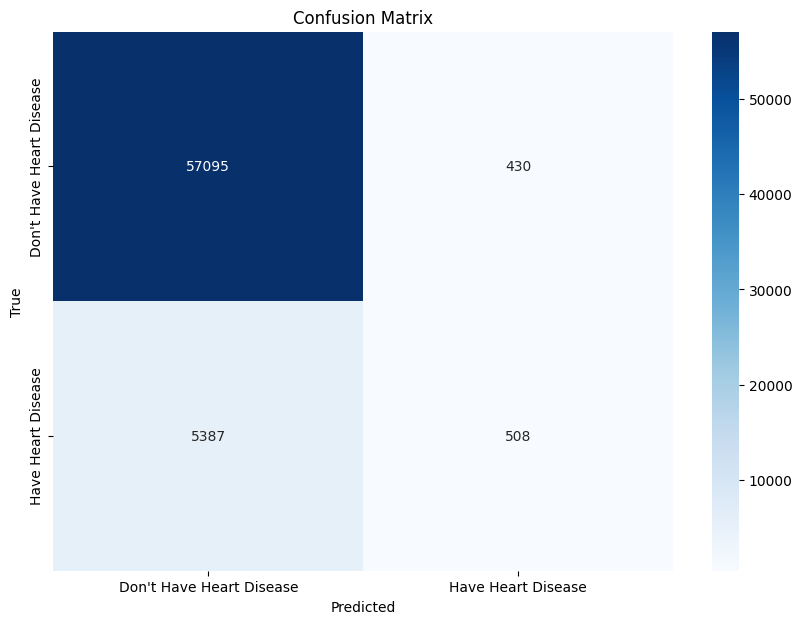

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

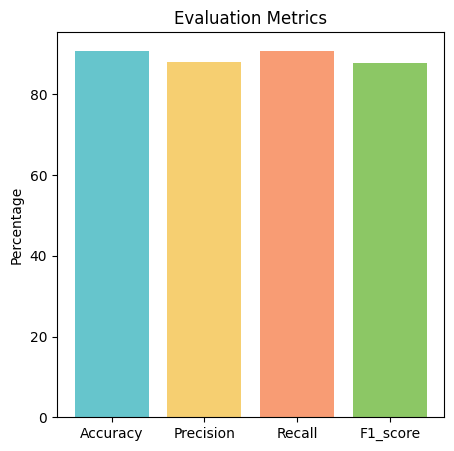

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(5, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

plt.show()


In [ ]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score
MLP,0.908278,0.879186,0.908278,0.876903
CNN,0.908452,0.880062,0.908452,0.873704


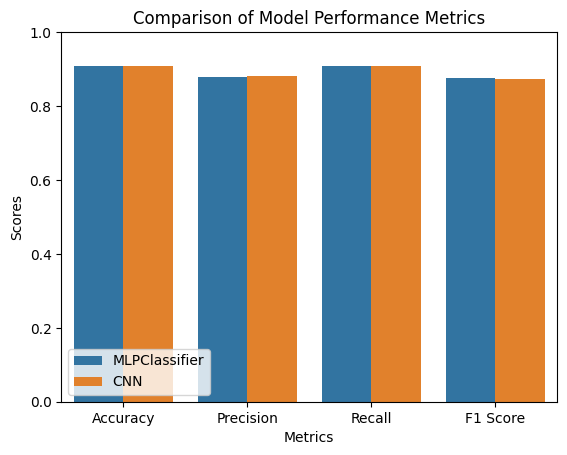

In [ ]:
# Data preparation
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'MLPClassifier': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                      recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')],
    'CNN': [accuracy_score(y_test, y_pred_binary), precision_score(y_test, y_pred_binary, average='weighted'),
            recall_score(y_test, y_pred_binary, average='weighted'), f1_score(y_test, y_pred_binary, average='weighted')]
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melt = df.melt(id_vars='Metrics', var_name='Classifiers', value_name='Scores')
barplot = sns.barplot(x='Metrics', y='Scores', hue='Classifiers', data=df_melt)

# Adding titles and labels
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)

plt.legend(loc='lower left')
# Show the plot
plt.show()